### **그래프를 통한 시각화**

#### **목표**
1. Total Power loss를 이루는 세 가지 요소를 각각 그래프로 표현
2. 세 가지 요소를 통합하여 로그스케일 그래프로 표현

---

#### **초기 요소 조작**
- 아래 변수들 중 온도 변수 (T) 를 조작하여 CPU 온도를 조절
- 트랜지스터의 개수 (N) 을 조작하여 CPU별로 다른 트랜지스터 개수를 반영
- 채널의 길이와 폭 (W), (L) 을 조작하여 공정별로 다른 트랜지스터 크기를 반영
- 공급 전압 (V_dd)와 문턱 전압 (V_th) 를 조작하여 특성 반영

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

q = 1.602e-19 # 전자 전하량
k = 1.381e-23 # 볼츠만 상수 (J/K)
T = 400 # 온도 (K)
V_dd = 1.0 # 공급 전압 (V)
V_th = 0.3 # 문턱 전압 (V)
tox = 1.5e-9 # 산화막 두께 (m)
eps_0 = 8.854e-12 # 진공 유전율 (F/m)
eps_ox_r = 3.9 # 산화막 상대 유전율 (SiO2)
eps_ox = eps_0*eps_ox_r # 산화막 유전율 (F/m)
n = 1.5 # Subthreshold Slope Factor
V_thermal = (k*T)/q  #≈26 mV
N = 20e9  # Number of Transistor
C_ox = eps_ox/tox  # 게이트 산화막 커패시턴스 (F/m^2)
W = 100e-9  # 채널 폭 100 nm
L = 18e-9   # 채널의 길이18 nm
W_over_L = W/L # 트랜지스터 크기 비율
V_gs = 0

# 누설 전류
I_leak_per_transistor = W_over_L*C_ox*(V_thermal**2)*np.exp((V_gs-V_th)/(n*V_thermal))
I_leak_total = I_leak_per_transistor*N
P_leak = I_leak_total*V_dd  # 누설 전력 (W)

# 스위칭 손실
alpha = 0.1  # 스위칭 확률
C_ox_per_transistor = C_ox*W*L
C_total = C_ox_per_transistor*N
frequencies = np.linspace(1e9, 6e9, 100)  # 1 GHz ~ 6 GHz
P_switch = alpha * C_total*V_dd**2 * frequencies  # 스위칭 전력

# 저항 및 열 손실
rho_cu = 1.68e-8 # 구리 저항
length_per_wire = 0.01 # 배선 길이
cross_section = 100e-9*20e-9 #단면적
R_total = rho_cu*length_per_wire/cross_section
I_dynamic = alpha*C_total*V_dd*frequencies
P_wire = I_dynamic**2*R_total

# 총 전력 소모
P_total = P_switch + P_leak + P_wire

---

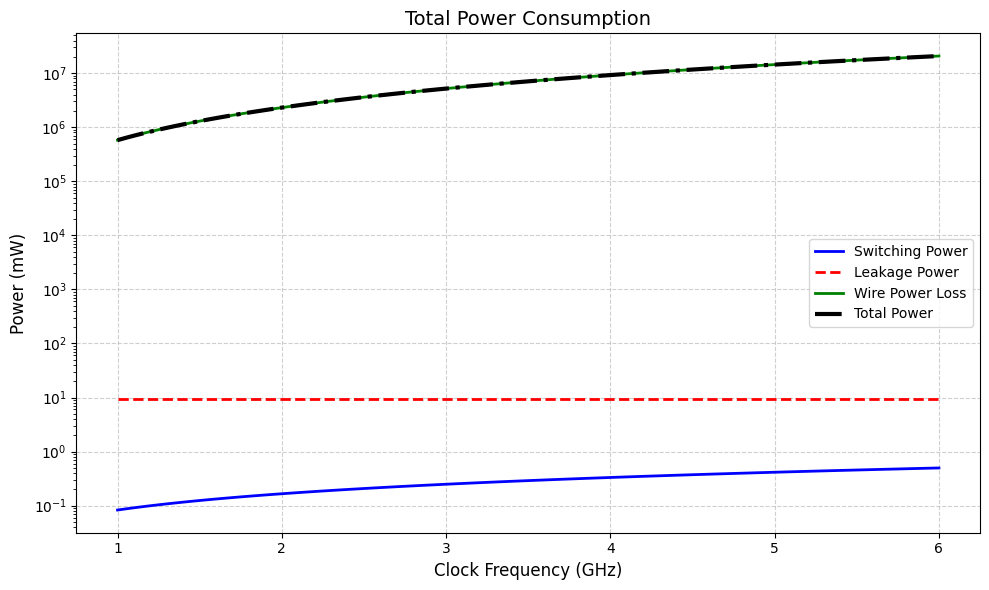

In [ ]:
# 전체 그래프, 로그스케일
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(frequencies / 1e9, P_switch / 1e3, label='Switching Power', color='blue', linewidth=2)
ax.plot(frequencies / 1e9, [P_leak / 1e3]*len(frequencies), label='Leakage Power', color='red', linestyle='--', linewidth=2)
ax.plot(frequencies / 1e9, P_wire / 1e3, label='Wire Power Loss', color='green', linewidth=2)
ax.plot(frequencies / 1e9, P_total / 1e3, label='Total Power', color='black', linestyle='-.', linewidth=3)

ax.set_yscale('log')
ax.set_title('Total Power Consumption', fontsize=14)
ax.set_xlabel('Clock Frequency (GHz)', fontsize=12)
ax.set_ylabel('Power (mW)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, which='major', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

---

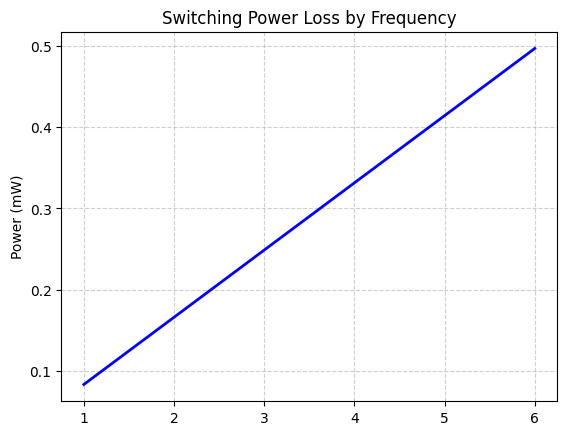

In [ ]:
# 스위칭 손실
plt.plot(frequencies / 1e9, P_switch / 1e3, color='blue', linewidth=2)
plt.title('Switching Power Loss by Frequency')
plt.ylabel('Power (mW)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

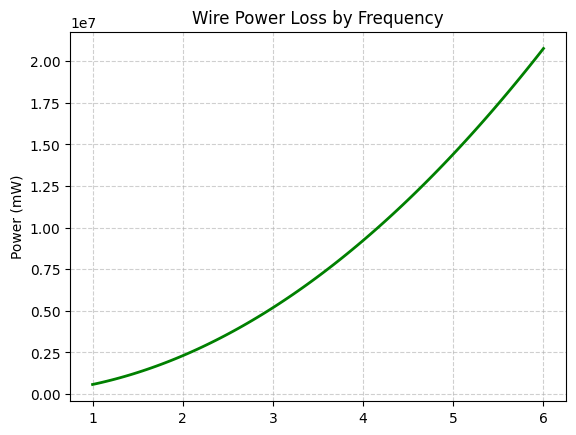

In [ ]:
# 도선 저항
plt.plot(frequencies / 1e9, P_wire / 1e3, color='green', linewidth=2)
plt.title('Wire Power Loss by Frequency')
plt.ylabel('Power (mW)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

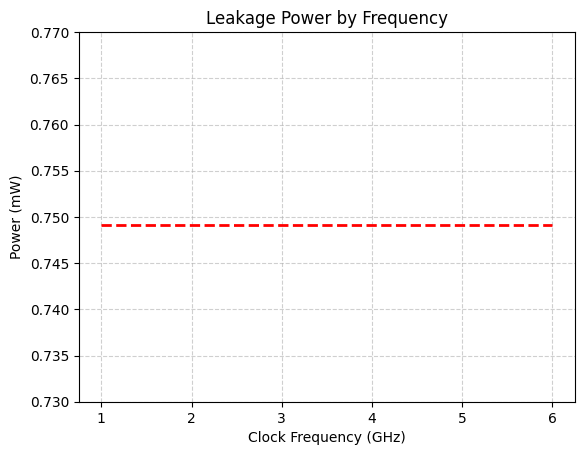

In [ ]:
# 누설 전력
plt.plot(frequencies / 1e9, [P_leak / 1e3]*len(frequencies), color='red', linestyle='--', linewidth=2)
plt.title('Leakage Power by Frequency')
plt.xlabel('Clock Frequency (GHz)')
plt.ylabel('Power (mW)')
plt.ylim(0.73,0.77)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()